This is a startbook for MULTI-Class , please see binary book for that starter pack

This notebook is a "starter" file that just concats and labels all of our datasets. Team members will clone this notebook and build off of it to ensure uniformity across ML models.
*make sure all the csv's that are being imported to this are in your working directory!*

In [1]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\jsmcm\anaconda3\lib\site-packages (0.9.1)Note: you may need to restart the kernel to use updated packages.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn import metrics
import numpy as np
import os

In [3]:
# Create a custom function for data transformation
# May as well import all of these features into the initial dataframe, you can cut it down..
# ..when you do the X,y train/test split
features = ['datetime',
          'latitude',
          'longitude',
          'absoluteAltitude', 
          'magneticHeading',
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed',
          'pitch', 
          'roll',
          'yaw',
          'angleOfAttack',
          'flightPathAngle',
          'verticalFlightPathAngle',
          'horizontalFlightPathAngle',
          'rollAcceleration',
          'pitchAcceleration',
          'yawAcceleration',
          'e1N1ng',
          'e2N1ng',
          'e1N2nf',
          'e2N2nf',
          'mainRotorRpm',
          'tailRotorRpm',
          'mainRotorTorque',
          'e1Itt',
          'e2Itt',
          'mainRotorInducedInflow',
          'flightDirectorPitch',
          'flightDirectorRoll',
          'climbOrDescentRate', 
          'hasWeightOnWheels',
          'turnRate to degPerSec',
          'cyclicPositionPitch',
          'cyclicPositionRoll',
          'collectivePosition',
          'antiTorquePedalPosition',
          'throttlePosition',
          'e1Torque',
          'e2Torque',
]


def df_transformation(df):
    df_temp = df[features]
    df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    output = df_temp.groupby(by=["datetime"], dropna=False).mean().reset_index()
    
    return output 

In [4]:
# reading files from 9/19 dataset
df1 = pd.read_csv('SimData_2022.09.19_16.00.36.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df1 = df_transformation(df1)


df2 = pd.read_csv('SimData_2022.09.19_16.38.20.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df2 = df_transformation(df2)


df3 = pd.read_csv('SimData_2022.09.19_17.51.37.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df3 = df_transformation(df3)



# reading files from 9/20 dataset
first_file = pd.read_csv('SimData_2022.09.20_16.22.07.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
first_file = df_transformation(first_file)


second_file = pd.read_csv('SimData_2022.09.20_16.28.31.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
second_file = df_transformation(second_file)


# reading file from 9/22 dataset
df4 = pd.read_csv('SimData_2022.09.22_17.11.56.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
d4f = df_transformation(df4)

<ipython-input-3-32ecd4a56c1e>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [5]:
#Combine files
df = pd.concat([first_file,second_file, df1, df2, df3, df4]).reset_index()

In [6]:
#just make maneuver col

df['maneuver'] = 0

#label data points from 9/19 set 
df.loc[(df['datetime'].between('2022-09-19 21:53:50' , '2022-09-19 21:55:55' , inclusive='both')),['maneuver']] = 'surface'
df.loc[(df['datetime'].between('2022-09-19 21:57:07' , '2022-09-19 21:59:20' , inclusive='both')),['maneuver']] = 'hover'
df.loc[(df['datetime'].between('2022-09-19 22:00:35' , '2022-09-19 22:01:44' , inclusive='both')),['maneuver']] = 'quick'
df.loc[(df['datetime'].between('2022-09-19 22:04:00' , '2022-09-19 22:06:39' , inclusive='both')),['maneuver']] = 'surface'
df.loc[(df['datetime'].between('2022-09-19 22:08:15' , '2022-09-19 22:10:24' , inclusive='both')),['maneuver']] = 'hover'
df.loc[(df['datetime'].between('2022-09-19 22:11:55' , '2022-09-19 22:13:21' , inclusive='both')),['maneuver']] = 'quick'

#label data points from 9/20 set
df.loc[(df['datetime'].between('2022-09-20 20:25:50' , '2022-09-20 20:27:54' , inclusive='both')),['maneuver']] = 'surface'
df.loc[(df['datetime'].between('2022-09-20 20:28:44' , '2022-09-20 20:30:06' , inclusive='both')),['maneuver']] = 'hover'
df.loc[(df['datetime'].between('2022-09-20 20:30:31' , '2022-09-20 20:32:16' , inclusive='both')),['maneuver']] = 'hover'
df.loc[(df['datetime'].between('2022-09-20 20:32:39' , '2022-09-20 20:34:06' , inclusive='both')),['maneuver']] = 'hover'
df.loc[(df['datetime'].between('2022-09-20 20:34:50' , '2022-09-20 20:36:51' , inclusive='both')),['maneuver']] = 'hover'

#label data points 9/22
df.loc[(df['datetime'].between('2022-09-22 21:16:37' , '2022-09-22 21:19:56' , inclusive='both')),['maneuver']] = 'surface'
df.loc[(df['datetime'].between('2022-09-22 21:20:41' , '2022-09-22 21:23:56' , inclusive='both')),['maneuver']] = 'hover'
df.loc[(df['datetime'].between('2022-09-22 21:28:35' , '2022-09-22 21:29:46' , inclusive='both')),['maneuver']] = 'hover'
#df.loc[(df['datetime'].between('2022-09-22 21:34:50' , '2022-09-22 21:35:46' , inclusive='both')),['maneuver']] = 'quick'
df.loc[(df['datetime'].between('2022-09-22 21:36:50' , '2022-09-22 21:37:10' , inclusive='both')),['maneuver']] = 'quick'
df.loc[(df['datetime'].between('2022-09-22 21:39:16' , '2022-09-22 21:39:42' , inclusive='both')),['maneuver']] = 'quick'
df.loc[(df['datetime'].between('2022-09-22 21:40:06' , '2022-09-22 21:40:36' , inclusive='both')),['maneuver']] = 'quick'
df.loc[(df['datetime'].between('2022-09-22 21:43:16' , '2022-09-22 21:43:41' , inclusive='both')),['maneuver']] = 'surface'
df.loc[(df['datetime'].between('2022-09-22 21:44:09' , '2022-09-22 21:45:31' , inclusive='both')),['maneuver']] = 'hover'

In [7]:
# Drops values of 0, that are not labeled
df.drop(df[df['maneuver']==0].index, inplace=True)

In [8]:
#Edit the model features to whatever you want to include in your model
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

#X is predictor features, y is classifier 
X = df[model_features]
y = df['maneuver']

In [9]:
#Showing class imbalance
predictor_count = y.value_counts()
print(predictor_count)

hover      13754
surface     8044
quick       2849
Name: maneuver, dtype: int64


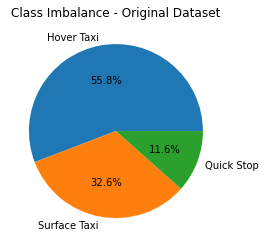

In [10]:
pie_labels = ["Hover Taxi", "Surface Taxi", "Quick Stop"]
plt.pie(predictor_count, labels = pie_labels, autopct='%1.1f%%')
plt.title("Class Imbalance - Original Dataset")
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [12]:
#This is the training and test split, the test size can be adjusted but should remain around 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)

In [13]:
df

,index,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,...,hasMainRotorHighRpmWarning,hasTailRotorChipWarning,hasTransmissionChipCaution,hasTransmissionOilTemperatureWarning,hasTransmissionOilPressureWarning,timestamp,gpsDateTime,seconds,vil,maneuver
223,223,2022-09-20 20:25:50.000,39.450663,-74.566196,0.290000,113.827175,101.529425,0.658775,0.659331,-1.950800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surface
224,224,2022-09-20 20:25:51.000,39.450662,-74.566189,0.469429,113.765086,101.467257,1.815429,1.824004,-2.992143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surface
225,225,2022-09-20 20:25:52.000,39.450659,-74.566174,0.494865,113.580027,101.282189,3.182162,3.187820,-3.122432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surface
226,226,2022-09-20 20:25:53.000,39.450656,-74.566151,0.395128,113.414872,101.117026,4.566308,4.566426,-2.590872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surface
227,227,2022-09-20 20:25:54.000,39.450651,-74.566120,0.443846,114.143000,101.845179,5.930205,5.930491,-2.826256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surface
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72519,67386,2022-09-22 21:45:30.904,20.889089,-156.433890,4.320000,151.847000,161.328000,4.589000,4.609526,9.872000,...,False,False,False,False,False,2022-09-22T21:45:30.904Z,2022-09-22T21:45:30.904Z,1.663898e+09,-2.0,hover
72520,67387,2022-09-22 21:45:30.924,20.889089,-156.433891,4.300000,151.785000,161.266000,4.564000,4.583456,9.864000,...,False,False,False,False,False,2022-09-22T21:45:30.924Z,2022-09-22T21:45:30.924Z,1.663898e+09,-2.0,hover
72521,67388,2022-09-22 21:45:30.963,20.889088,-156.433891,4.270000,151.624000,161.105000,4.501000,4.517691,9.842000,...,False,False,False,False,False,2022-09-22T21:45:30.963Z,2022-09-22T21:45:30.963Z,1.663898e+09,-2.0,hover
72522,67389,2022-09-22 21:45:30.980,20.889088,-156.433891,4.260000,151.578000,161.059000,4.483000,4.499916,9.835000,...,False,False,False,False,False,2022-09-22T21:45:30.980Z,2022-09-22T21:45:30.980Z,1.663898e+09,-2.0,hover


[Text(0.5, 1.0, 'Correlation Heatmap')]

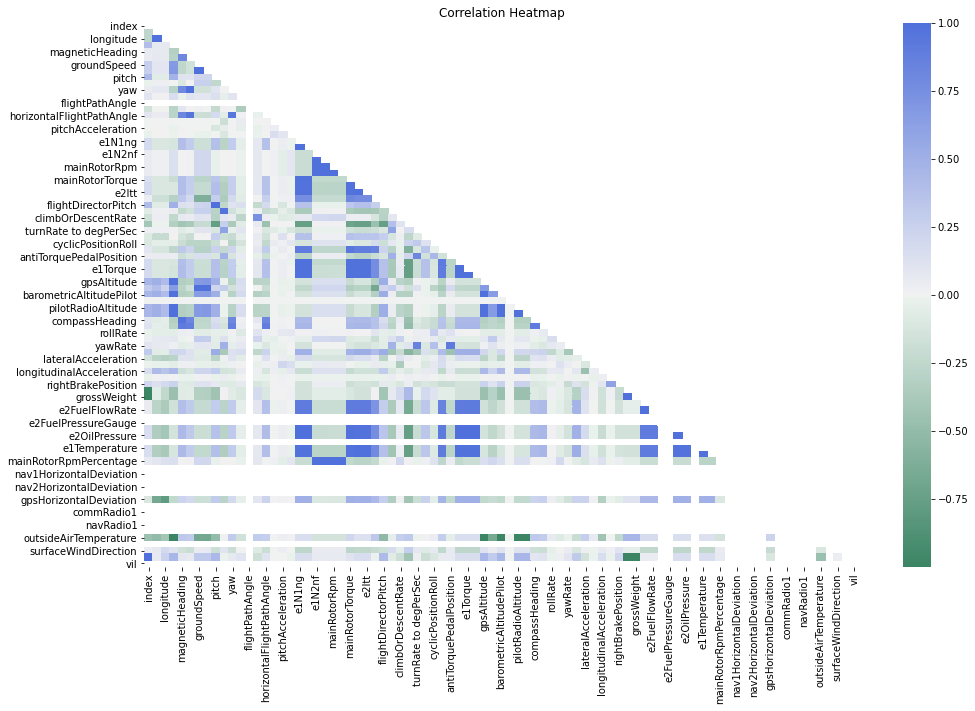

In [14]:
#correlation heatmap
df_corr = df.corr()
plt.figure(figsize=(16, 10))
cmap = sns.diverging_palette(150, 260, as_cmap=True)
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, mask=mask, cmap=cmap).set(title = 'Correlation Heatmap')

In [15]:
clf = DecisionTreeClassifier(max_depth = 5, random_state = 56)

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=56)

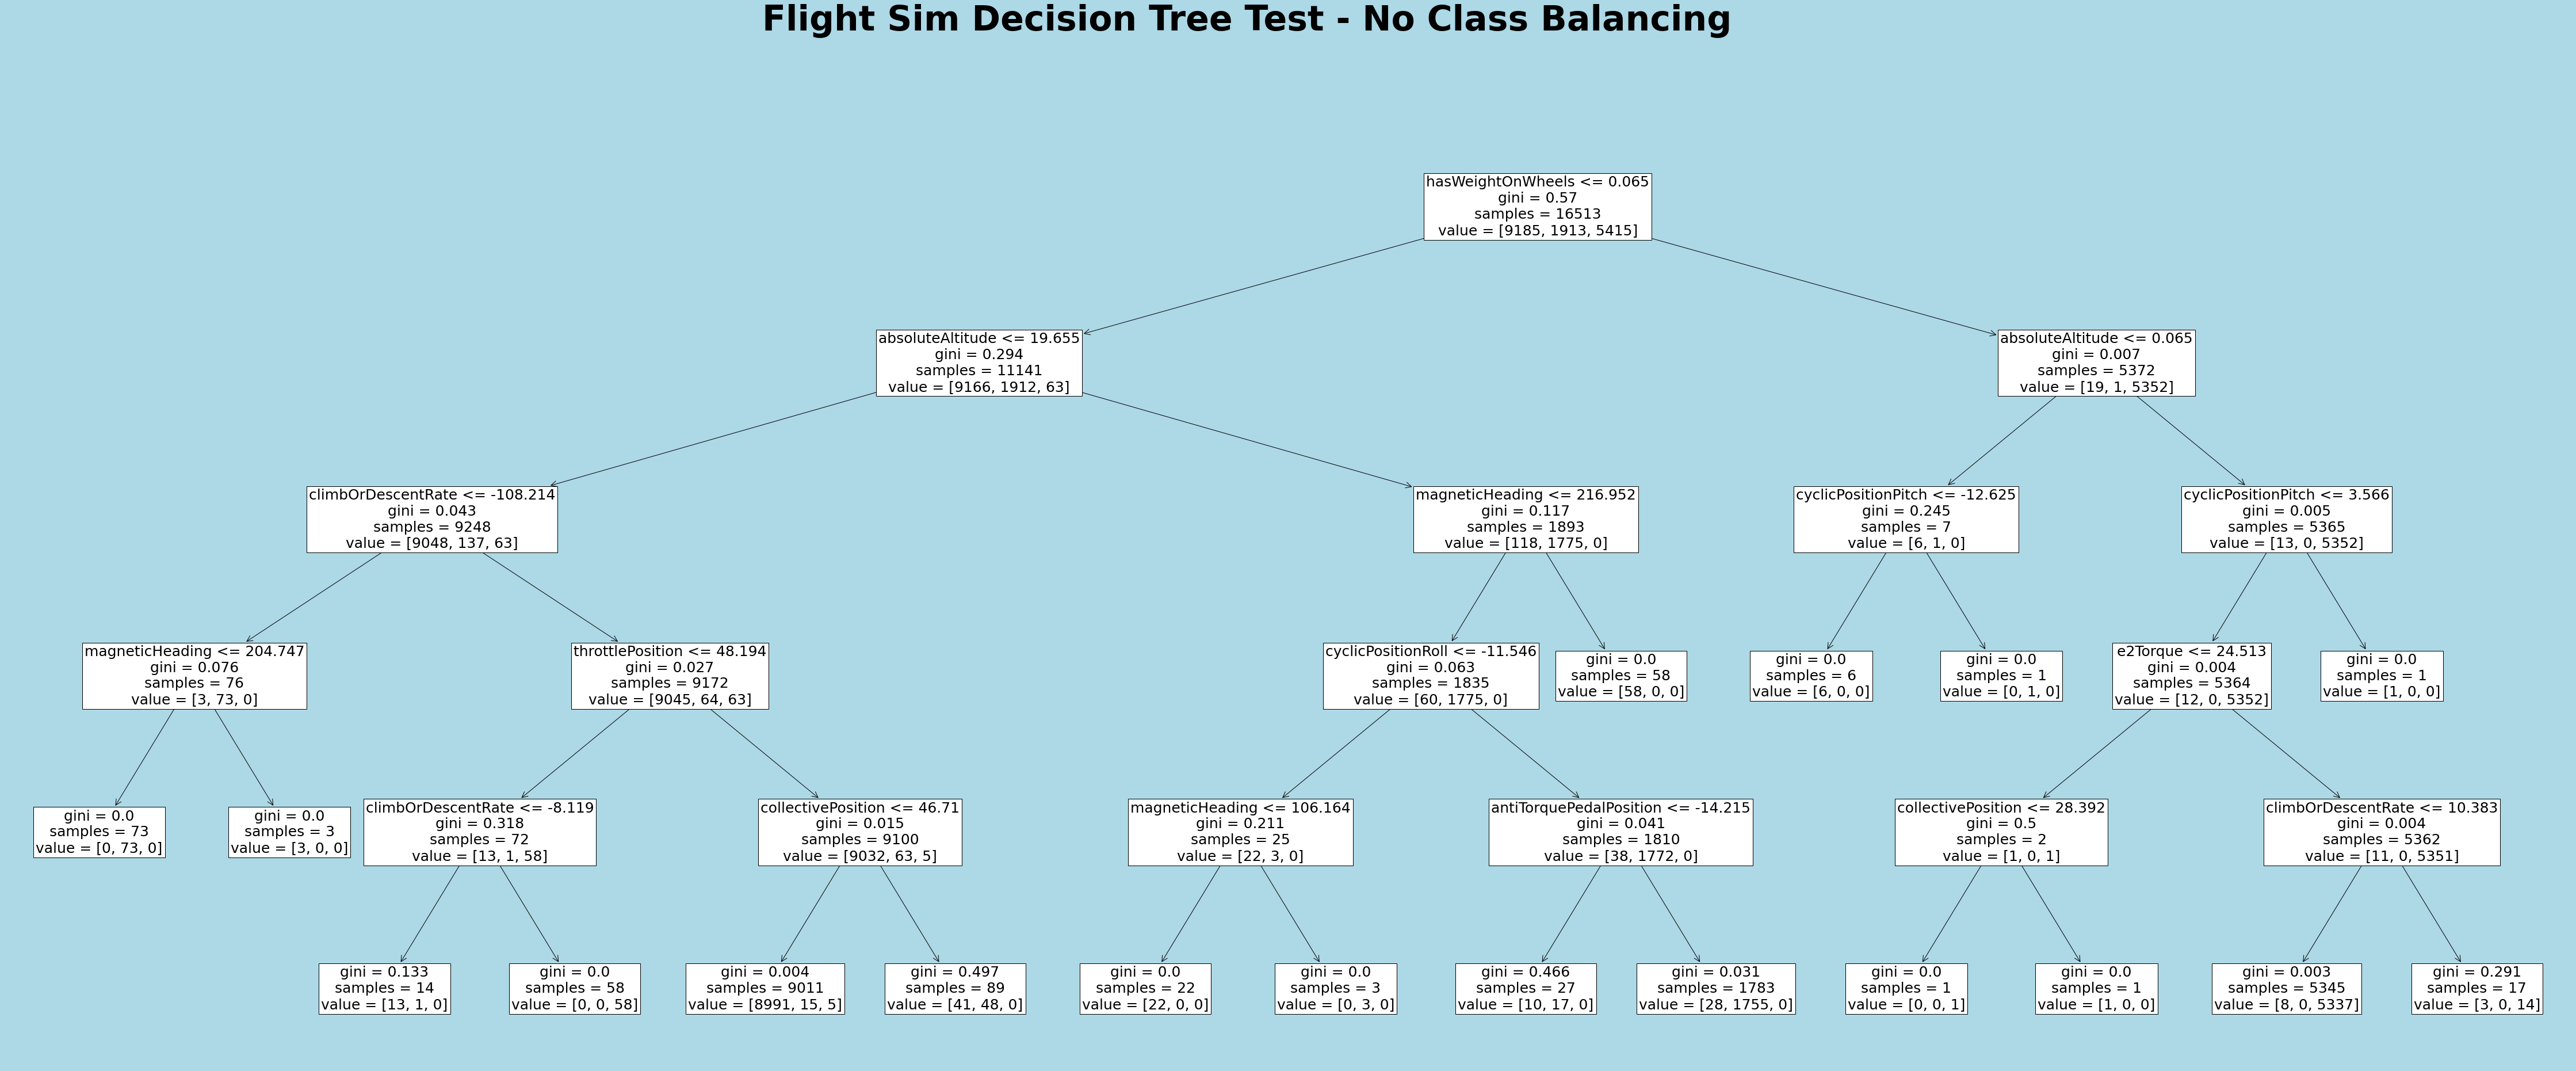

In [17]:
#tree visualization test
plt.subplots(figsize=(80, 30), facecolor='lightblue')
plt.suptitle("Flight Sim Decision Tree Test - No Class Balancing", fontweight="bold", fontsize="60")
tree_graphic_test = tree.plot_tree(
    clf,
    feature_names = model_features,
    fontsize= 25)
plt.show()

In [18]:
#tree text based test
tree_text_test = export_text(clf)
print(tree_text_test)

|--- feature_0 <= 0.07
|   |--- feature_1 <= 19.66
|   |   |--- feature_4 <= -108.21
|   |   |   |--- feature_2 <= 204.75
|   |   |   |   |--- class: quick
|   |   |   |--- feature_2 >  204.75
|   |   |   |   |--- class: hover
|   |   |--- feature_4 >  -108.21
|   |   |   |--- feature_10 <= 48.19
|   |   |   |   |--- feature_4 <= -8.12
|   |   |   |   |   |--- class: hover
|   |   |   |   |--- feature_4 >  -8.12
|   |   |   |   |   |--- class: surface
|   |   |   |--- feature_10 >  48.19
|   |   |   |   |--- feature_8 <= 46.71
|   |   |   |   |   |--- class: hover
|   |   |   |   |--- feature_8 >  46.71
|   |   |   |   |   |--- class: quick
|   |--- feature_1 >  19.66
|   |   |--- feature_2 <= 216.95
|   |   |   |--- feature_7 <= -11.55
|   |   |   |   |--- feature_2 <= 106.16
|   |   |   |   |   |--- class: hover
|   |   |   |   |--- feature_2 >  106.16
|   |   |   |   |   |--- class: quick
|   |   |   |--- feature_7 >  -11.55
|   |   |   |   |--- feature_9 <= -14.22
|   |   |   |   |

In [19]:
y_pred1 = clf.predict(X_test)
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred1))

Decision Tree Accuracy: 0.9928694369313991


In [20]:
dtcm1 = confusion_matrix(y_test, y_pred1)
print(dtcm1)

[[4523   41    5]
 [   9  927    0]
 [   3    0 2626]]


[Text(0, 0.5, 'Hover Taxi'),
 Text(0, 1.5, 'Quick Stop'),
 Text(0, 2.5, 'Surface Taxi')]

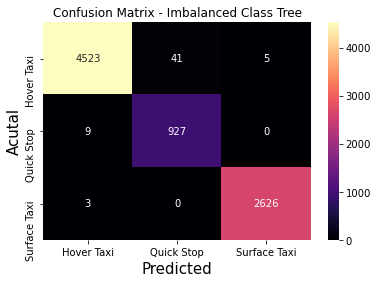

In [21]:
cmp_df1 = pd.DataFrame(dtcm1)
ax = plt.axes()
sns.heatmap(cmp_df1, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Imbalanced Class Tree')
ax.set_xlabel('Predicted', fontsize = 15)
ax.xaxis.set_ticklabels(['Hover Taxi', 'Quick Stop', 'Surface Taxi'])
ax.set_ylabel('Acutal', fontsize = 15)
ax.yaxis.set_ticklabels(['Hover Taxi', 'Quick Stop', 'Surface Taxi'])

In [22]:
class_weights = df['maneuver'].value_counts()/len(df)
print(class_weights)

hover      0.558040
surface    0.326368
quick      0.115592
Name: maneuver, dtype: float64


In [23]:
clf2 = DecisionTreeClassifier(max_depth = 5, random_state = 56, class_weight = 'balanced')
clf2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=56)

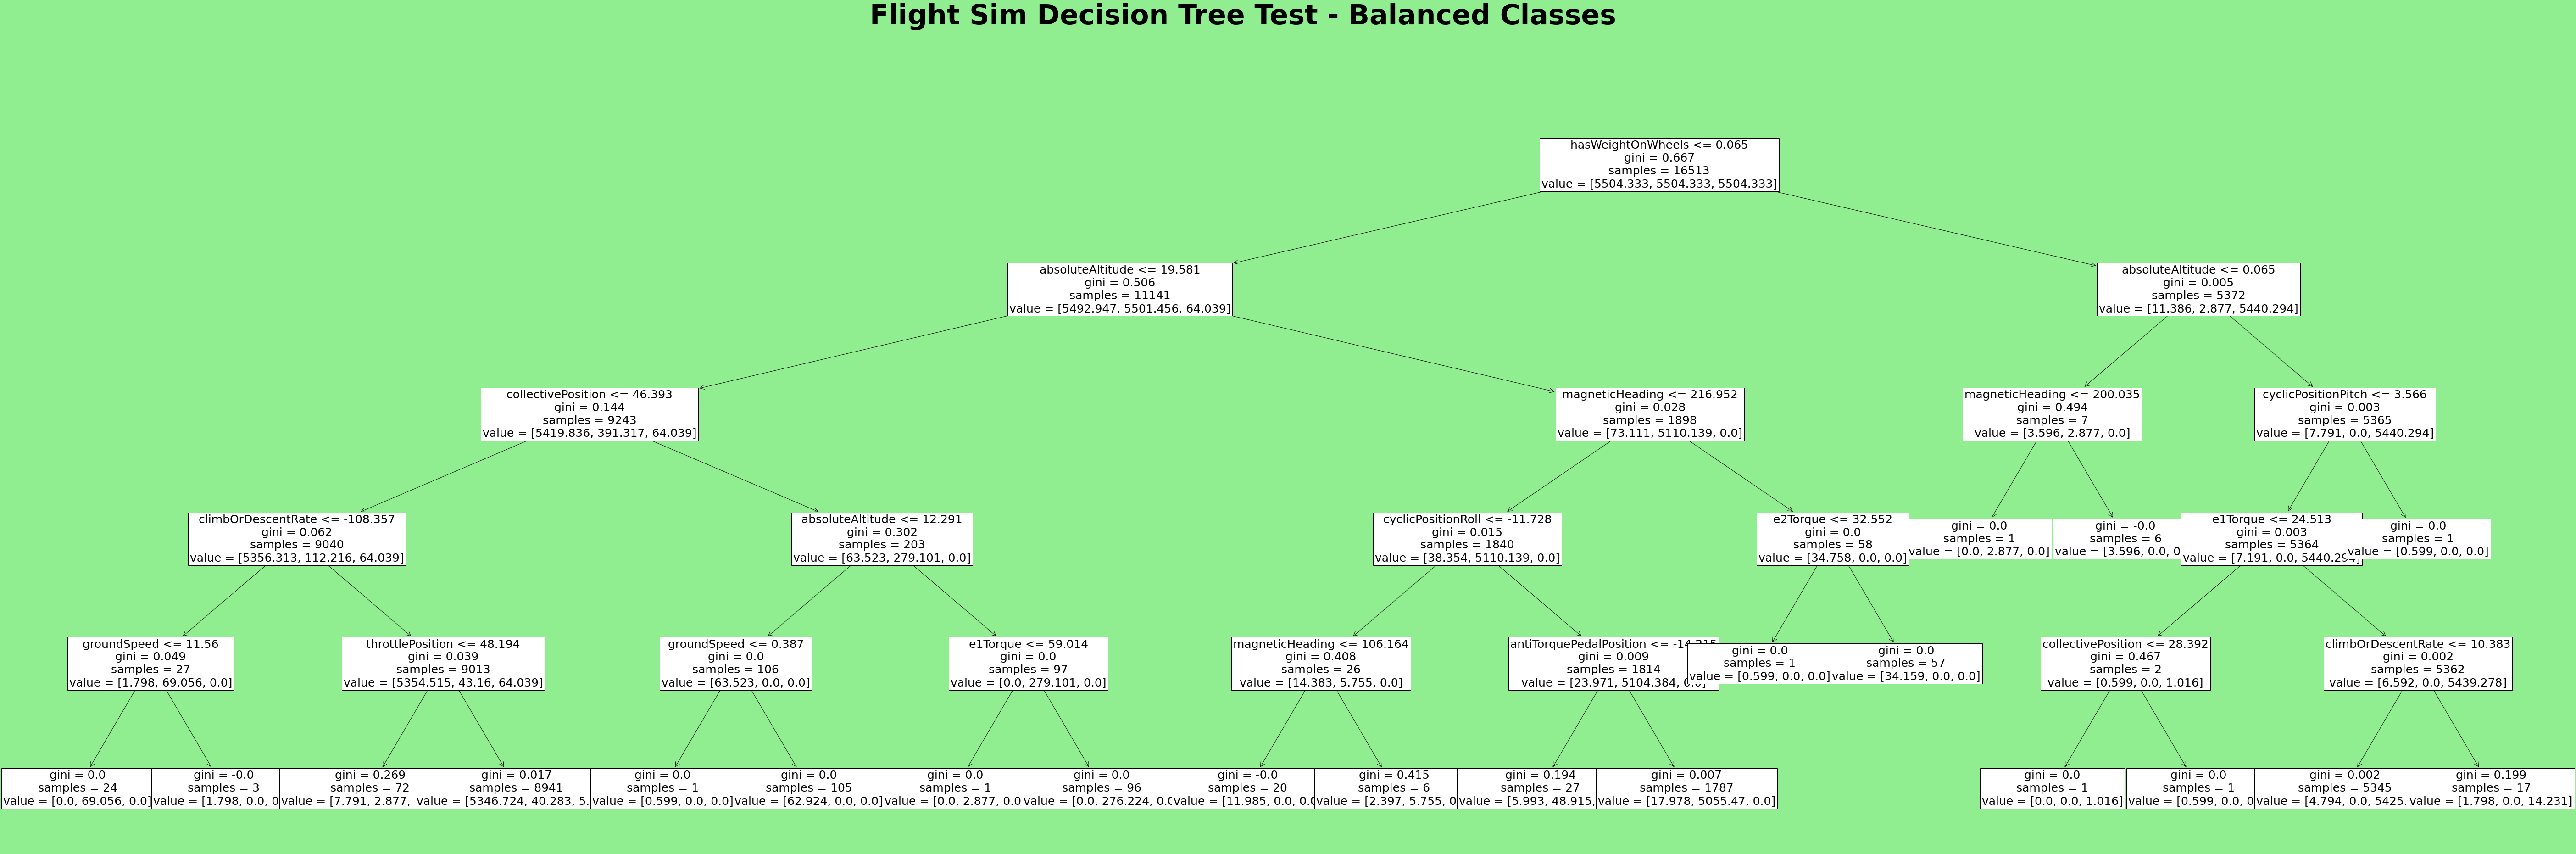

In [24]:
#tree visualization test
plt.subplots(figsize=(100, 30), facecolor='lightgreen')
plt.suptitle("Flight Sim Decision Tree Test - Balanced Classes", fontweight="bold", fontsize="60")
tree_graphic_test = tree.plot_tree(
    clf2,
    feature_names = model_features,
    fontsize= 25)
plt.show()

In [25]:
tree_text_test = export_text(clf2)
print(tree_text_test)

|--- feature_0 <= 0.07
|   |--- feature_1 <= 19.58
|   |   |--- feature_8 <= 46.39
|   |   |   |--- feature_4 <= -108.36
|   |   |   |   |--- feature_3 <= 11.56
|   |   |   |   |   |--- class: quick
|   |   |   |   |--- feature_3 >  11.56
|   |   |   |   |   |--- class: hover
|   |   |   |--- feature_4 >  -108.36
|   |   |   |   |--- feature_10 <= 48.19
|   |   |   |   |   |--- class: surface
|   |   |   |   |--- feature_10 >  48.19
|   |   |   |   |   |--- class: hover
|   |   |--- feature_8 >  46.39
|   |   |   |--- feature_1 <= 12.29
|   |   |   |   |--- feature_3 <= 0.39
|   |   |   |   |   |--- class: hover
|   |   |   |   |--- feature_3 >  0.39
|   |   |   |   |   |--- class: hover
|   |   |   |--- feature_1 >  12.29
|   |   |   |   |--- feature_11 <= 59.01
|   |   |   |   |   |--- class: quick
|   |   |   |   |--- feature_11 >  59.01
|   |   |   |   |   |--- class: quick
|   |--- feature_1 >  19.58
|   |   |--- feature_2 <= 216.95
|   |   |   |--- feature_7 <= -11.73
|   |   |  

In [26]:
y_pred2 = clf2.predict(X_test)
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred2))

Decision Tree Accuracy: 0.9943447258421441


In [27]:
dtcm2 = confusion_matrix(y_test, y_pred2)
print(dtcm2)

[[4534   27    8]
 [   7  928    1]
 [   3    0 2626]]


[Text(0, 0.5, 'Hover Taxi'),
 Text(0, 1.5, 'Quick Stop'),
 Text(0, 2.5, 'Surface Taxi')]

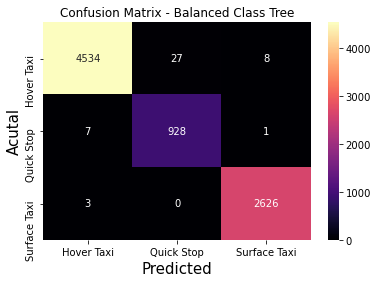

In [28]:
cmp_df2 = pd.DataFrame(dtcm2)
ax = plt.axes()
sns.heatmap(cmp_df2, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Balanced Class Tree')
ax.set_xlabel('Predicted', fontsize = 15)
ax.xaxis.set_ticklabels(['Hover Taxi', 'Quick Stop', 'Surface Taxi'])
ax.set_ylabel('Acutal', fontsize = 15)
ax.yaxis.set_ticklabels(['Hover Taxi', 'Quick Stop', 'Surface Taxi'])